In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
#read in data
df = pd.read_csv('../data/raw/raw_material_export.csv')
df.head()

,country_id,product,product_code,flow,unit,year,value
0,Albania,pulpwood,11,EXPORTS,1000 m.t.,2007,0.00
1,Albania,roundwood,14,EXPORTS,1000 m3,2007,58.59
2,Albania,sawnwood,16,EXPORTS,1000 m3,2007,65.48
3,Albania,wood fuel,21,EXPORTS,1000 m3,2007,56.30
4,Armenia,pulpwood,11,EXPORTS,1000 m.t.,2007,0.00


In [7]:
#drop countries in the list
non_euro_states =  [ 'United States', 'Canada', 'Israel', 'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan' , 'Uzbekistan']
df = df[~df['country_id'].isin(non_euro_states)]

In [8]:
#search for the countries in the list
df['country_id'].unique()

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
      dtype=object)

# Year for analysis

We will use a random generator to chose a random year

In [9]:
#pick a random number between 2007 and 2021
np.random.seed(42) #so that the number is the same each time
year = np.random.randint(2007, 2021)
print(year)

2013


so we will use year 2013

In [10]:
#select the data for year 2013
df = df[df['year'] == 2013]
df.head()

,country_id,product,product_code,flow,unit,year,value
1272,Albania,pulpwood,11,EXPORTS,1000 m.t.,2013,0.01
1273,Albania,roundwood,14,EXPORTS,1000 m3,2013,88.37
1274,Albania,sawnwood,16,EXPORTS,1000 m3,2013,35.17
1275,Albania,wood fuel,21,EXPORTS,1000 m3,2013,75.90
1276,Armenia,pulpwood,11,EXPORTS,1000 m.t.,2013,0.00


In [11]:
#read df into a csv file
df.to_csv('../data/cleaned/2013_export.csv', index=False)

WE WILL USE TABLEAU TO VISUALIZE THE DATAS

NEXT WE WILL CONSIDER PRODUCTION DATA TO DETERMINE HOW WHICH EU STATES ARE TURNING OUT MORE FINISHED PRODUCTS COMPARED TO THEIR IMPOR

In [12]:
data= pd.read_csv('../data/cleaned/grouped_melted.csv')
data.head(20)

,country_id,product,product_code,flow,unit,year,value
0,Albania,engineered wood products,4,IMPORTS,1000 US$,2007,15888.03
1,Albania,engineered wood products,4,IMPORTS,1000 m3,2007,140.81
2,Albania,engineered wood products,4,PRODUCTION,1000 m3,2007,12.00
3,Albania,"paper,print and packaging",8,EXPORTS,1000 m.t.,2007,0.08
4,Albania,"paper,print and packaging",8,IMPORTS,1000 m.t.,2007,20.63
5,Albania,pulpwood,11,IMPORTS,1000 m.t.,2007,4.30
6,Albania,roundwood,14,EXPORTS,1000 US$,2007,1750.46
7,Albania,roundwood,14,EXPORTS,1000 m3,2007,58.59
8,Albania,roundwood,14,IMPORTS,1000 US$,2007,343.42
9,Albania,roundwood,14,IMPORTS,1000 m3,2007,2.95


In [13]:
data2= data.copy()

In [14]:
#drop all exports value in flow column
data2 = data2[data2['flow'] != 'EXPORTS']
data2['flow'].unique()

array(['IMPORTS', 'PRODUCTION', 'REMOVALS'], dtype=object)

In [15]:
#display rows where the value in the flow column is removals,production  and export
data2 = data[(data['flow'] == 'REMOVALS') | (data['flow'] == 'EXPORTS')]


In [16]:
#drop exports in the flow column where unit is in 1000 us$
data2 = data2[~((data2['flow'] == 'EXPORTS') & (data2['unit'] == '1000 US$'))]

In [17]:
data2

,country_id,product,product_code,flow,unit,year,value
3,Albania,"paper,print and packaging",8,EXPORTS,1000 m.t.,2007,0.08
7,Albania,roundwood,14,EXPORTS,1000 m3,2007,58.59
10,Albania,roundwood,14,REMOVALS,1000 m3,2007,1149.97
11,Albania,sawlogs and veneer logs,15,REMOVALS,1000 m3,2007,29.99
13,Albania,sawnwood,16,EXPORTS,1000 m3,2007,65.48
...,...,...,...,...,...,...,...
65469,Uzbekistan,sawnwood,16,EXPORTS,1000 m3,2021,2.60
65479,Uzbekistan,wood charcoal,20,EXPORTS,1000 m.t.,2021,0.08
65484,Uzbekistan,wood fuel,21,EXPORTS,1000 m3,2021,0.02
65487,Uzbekistan,wood fuel,21,REMOVALS,1000 m3,2021,22.84


In [18]:
#select raw materials that are in the list
raw_material = ['roundwood']
data2 = data2[data2['product'].isin(raw_material)]  

In [19]:
data2.head(10)

,country_id,product,product_code,flow,unit,year,value
7,Albania,roundwood,14,EXPORTS,1000 m3,2007,58.59
10,Albania,roundwood,14,REMOVALS,1000 m3,2007,1149.97
58,Armenia,roundwood,14,EXPORTS,1000 m3,2007,13.22
61,Armenia,roundwood,14,REMOVALS,1000 m3,2007,104.00
136,Austria,roundwood,14,EXPORTS,1000 m3,2007,4409.99
139,Austria,roundwood,14,REMOVALS,1000 m3,2007,75676.58
211,Azerbaijan,roundwood,14,EXPORTS,1000 m3,2007,0.05
214,Azerbaijan,roundwood,14,REMOVALS,1000 m3,2007,21.80
280,Belarus,roundwood,14,EXPORTS,1000 m3,2007,7251.45
283,Belarus,roundwood,14,REMOVALS,1000 m3,2007,36028.60


In [21]:
#export data to a xlsx file
data2.to_excel('../data/cleaned/roundwood-harvest_export.xlsx', index=False)

In [23]:
#retrieve all data where country_id is germany FROM DATA2
data3 = data2[data2['country_id'] == 'Germany']


In [24]:
#select year 2017 to 2021
data3 = data3[(data3['year'] >= 2017) & (data3['year'] <= 2021)]

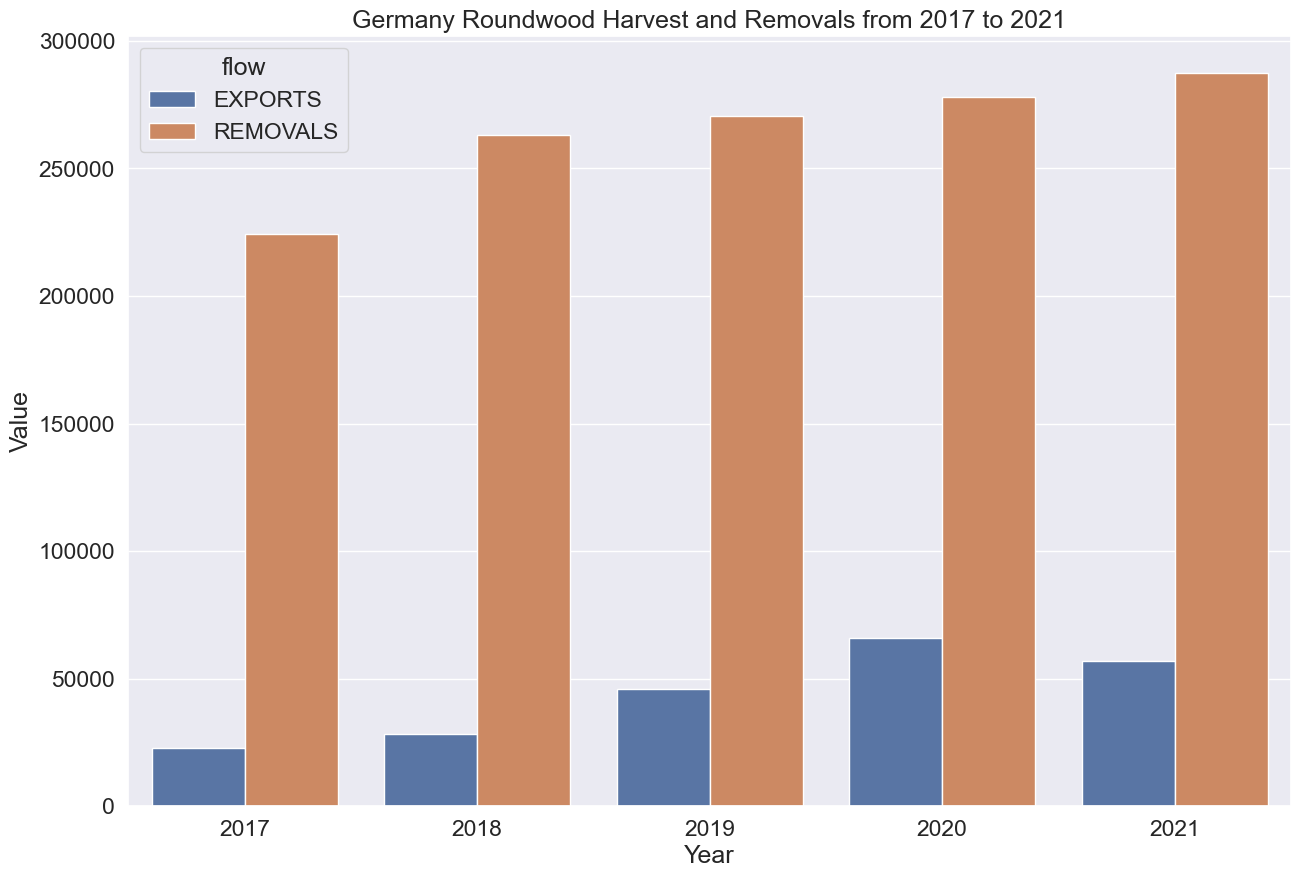

In [25]:
#plot a seaborn grouped barplot that shows germany's roundwood harvest and removal from 2017 to 2021
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5)
ax = sns.barplot(x="year", y="value", hue="flow", data=data3)
ax.set_title('Germany Roundwood Harvest and Removals from 2017 to 2021')
ax.set_ylabel('Value')
ax.set_xlabel('Year')
plt.show()


In [ ]:
#export image to a png file
ax.figure.savefig('../images/germany_roundwood_harvest_removals.png')

In [27]:
#export data3 to a xlsx file
data3.to_excel('../data/cleaned/germany_roundwood-harvest_export.xlsx', index=False)

In [28]:
data4 = data.copy()
data4.head()

,country_id,product,product_code,flow,unit,year,value
0,Albania,engineered wood products,4,IMPORTS,1000 US$,2007,15888.03
1,Albania,engineered wood products,4,IMPORTS,1000 m3,2007,140.81
2,Albania,engineered wood products,4,PRODUCTION,1000 m3,2007,12.00
3,Albania,"paper,print and packaging",8,EXPORTS,1000 m.t.,2007,0.08
4,Albania,"paper,print and packaging",8,IMPORTS,1000 m.t.,2007,20.63


In [29]:
#chose all rows for engineered wood products and production value
data4 = data4[(data4['product'] == 'engineered wood products') & (data4['flow'] == 'PRODUCTION')]
data4.head(20)

,country_id,product,product_code,flow,unit,year,value
2,Albania,engineered wood products,4,PRODUCTION,1000 m3,2007,12.00
42,Armenia,engineered wood products,4,PRODUCTION,1000 m3,2007,20.58
103,Austria,engineered wood products,4,PRODUCTION,1000 m3,2007,4918.40
257,Belarus,engineered wood products,4,PRODUCTION,1000 m3,2007,1321.00
341,Belgium,engineered wood products,4,PRODUCTION,1000 m3,2007,3052.00
433,Bosnia and Herzegovina,engineered wood products,4,PRODUCTION,1000 m3,2007,40.00
516,Bulgaria,engineered wood products,4,PRODUCTION,1000 m3,2007,1295.50
604,Canada,engineered wood products,4,PRODUCTION,1000 m3,2007,32026.00
698,Croatia,engineered wood products,4,PRODUCTION,1000 m3,2007,155.00
782,Cyprus,engineered wood products,4,PRODUCTION,1000 m3,2007,6.56


In [30]:
#reiindex data4
data4 = data4.reset_index(drop=True)

In [33]:
#choose a random year between 2007 and 2021 inclusive
np.random.seed(60)
year = np.random.randint(2007, 2021)
print(year)

2020


In [34]:
#select data for year 2020
data4 = data4[data4['year'] == 2020]
data4.head()

,country_id,product,product_code,flow,unit,year,value
549,Austria,engineered wood products,4,PRODUCTION,1000 m3,2020,6147.40
550,Azerbaijan,engineered wood products,4,PRODUCTION,1000 m3,2020,2.60
551,Belarus,engineered wood products,4,PRODUCTION,1000 m3,2020,9466.12
552,Belgium,engineered wood products,4,PRODUCTION,1000 m3,2020,3950.94
553,Bosnia and Herzegovina,engineered wood products,4,PRODUCTION,1000 m3,2020,82.00


In [37]:
#drop all coountries in the list
data4 = data4[~data4['country_id'].isin(non_euro_states)]
data4['country_id'].unique()


array(['Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'Ukraine', 'United Kingdom'], dtype=object)

In [38]:
#reindex data4
data4 = data4.reset_index(drop=True)

In [39]:
#export data4 to a xlsx file
data4.to_excel('../data/cleaned/engineered_wood_products_production2020.xlsx', index=False)